In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import sklearn
import sklearn.datasets
import pandas as pd
import os
import datetime,time

Added

In [2]:
# df_ML_data = pd.read_csv('df_ML_weekdays.csv', header=0)
passenger_data=pd.read_csv('merged_ML1.csv', header=0)
passenger_data.head()

,Unnamed: 0,C/A,Unit,SCP,Station,Line Name,Division,Date,Time,Description,...,Exits_shifted,Diff_Entries,Diff_Exits,Diff_Entries_Adjusted,Diff_Exits_Adjusted,Total_Traffic_Passengers,Station_lat,Station_lon,City,Zip
0,4330508,R101,R001,02-00-00,south ferry,1RW,IRT,12/30/2016,20:00:00,REGULAR,...,4307735.0,410.0,65.0,410.0,65.0,475.0,40.702068,-74.013664,NaN,NaN
1,4330509,R101,R001,02-00-00,south ferry,1RW,IRT,12/30/2016,16:00:00,REGULAR,...,4307597.0,456.0,138.0,456.0,138.0,594.0,40.702068,-74.013664,NaN,NaN
2,4330510,R101,R001,02-00-00,south ferry,1RW,IRT,12/30/2016,12:00:00,REGULAR,...,4307277.0,192.0,320.0,192.0,320.0,512.0,40.702068,-74.013664,NaN,NaN
3,4330511,R101,R001,02-00-00,south ferry,1RW,IRT,12/30/2016,08:00:00,REGULAR,...,4307171.0,100.0,106.0,100.0,106.0,206.0,40.702068,-74.013664,NaN,NaN
4,4330512,R101,R001,02-00-00,south ferry,1RW,IRT,12/30/2016,04:00:00,REGULAR,...,4307163.0,13.0,8.0,13.0,8.0,21.0,40.702068,-74.013664,NaN,NaN


In [3]:
passenger_data.iloc[0]

Unnamed: 0                      4330508
C/A                                R101
Unit                               R001
SCP                            02-00-00
Station                     south ferry
Line Name                           1RW
Division                            IRT
Date                         12/30/2016
Time                           20:00:00
Description                     REGULAR
Entries                         2327265
Exits                           4307800
Entries_shifted             2.32686e+06
Exits_shifted               4.30774e+06
Diff_Entries                        410
Diff_Exits                           65
Diff_Entries_Adjusted               410
Diff_Exits_Adjusted                  65
Total_Traffic_Passengers            475
Station_lat                     40.7021
Station_lon                    -74.0137
City                                NaN
Zip                                 NaN
Name: 0, dtype: object

In [4]:
passenger_data=passenger_data[['Station', 'Line Name', 'Division',
       'Date', 'Time', 'Total_Traffic_Passengers', 'City', 'Zip']]
passenger_data.head()

,Station,Line Name,Division,Date,Time,Total_Traffic_Passengers,City,Zip
0,south ferry,1RW,IRT,12/30/2016,20:00:00,475.0,NaN,NaN
1,south ferry,1RW,IRT,12/30/2016,16:00:00,594.0,NaN,NaN
2,south ferry,1RW,IRT,12/30/2016,12:00:00,512.0,NaN,NaN
3,south ferry,1RW,IRT,12/30/2016,08:00:00,206.0,NaN,NaN
4,south ferry,1RW,IRT,12/30/2016,04:00:00,21.0,NaN,NaN


In [5]:
for coln in ['Station', 'Line Name', 'Division','City', 'Zip']:
    print(passenger_data[coln].value_counts())

south ferry    30733
Name: Station, dtype: int64
1R     25693
1RW     5040
Name: Line Name, dtype: int64
IRT    30733
Name: Division, dtype: int64
Series([], Name: City, dtype: int64)
Series([], Name: Zip, dtype: int64)


In [6]:
passenger_data=passenger_data[['Line Name', 
       'Date', 'Time', 'Total_Traffic_Passengers']]
passenger_data.head()

,Line Name,Date,Time,Total_Traffic_Passengers
0,1RW,12/30/2016,20:00:00,475.0
1,1RW,12/30/2016,16:00:00,594.0
2,1RW,12/30/2016,12:00:00,512.0
3,1RW,12/30/2016,08:00:00,206.0
4,1RW,12/30/2016,04:00:00,21.0


In [7]:
passenger_data['Date']=pd.to_datetime(passenger_data['Date'])
passenger_data.head()

,Line Name,Date,Time,Total_Traffic_Passengers
0,1RW,2016-12-30,20:00:00,475.0
1,1RW,2016-12-30,16:00:00,594.0
2,1RW,2016-12-30,12:00:00,512.0
3,1RW,2016-12-30,08:00:00,206.0
4,1RW,2016-12-30,04:00:00,21.0


In [8]:
passenger_data.count()

Line Name                   30733
Date                        30733
Time                        30733
Total_Traffic_Passengers    30733
dtype: int64

In [9]:
passenger_data.isnull().sum()

Line Name                   0
Date                        0
Time                        0
Total_Traffic_Passengers    0
dtype: int64

In [10]:
passenger_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30733 entries, 0 to 30732
Data columns (total 4 columns):
Line Name                   30733 non-null object
Date                        30733 non-null datetime64[ns]
Time                        30733 non-null object
Total_Traffic_Passengers    30733 non-null float64
dtypes: datetime64[ns](1), float64(1), object(2)
memory usage: 960.5+ KB


In [11]:
df_weather = pd.read_csv('weather_data.csv', header=0)
df_weather.head()

,Unnamed: 0,Date,city_id,temp,humidity,wind_speed,rain_1h,rain_3h,rain_today,snow_today,clouds_all,weather_description,real_temp
0,0,2013-01-01,0:00:00,272.03,310,20.0,Clouds,few,02n,NaN,NaN,NaN,29.984
1,1,2013-01-01,1:00:00,271.46,310,20.0,Clouds,few,02n,NaN,NaN,NaN,28.958
2,2,2013-01-01,2:00:00,271.19,330,20.0,Clouds,few,02n,NaN,NaN,NaN,28.472
3,3,2013-01-01,3:00:00,271.07,300,20.0,Clouds,few,02n,NaN,NaN,NaN,28.256
4,4,2013-01-01,4:00:00,270.83,300,1.0,Clear,sky,clear,NaN,NaN,NaN,27.824


In [12]:
df_weather.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 61113 entries, 0 to 61112
Data columns (total 13 columns):
Unnamed: 0             61113 non-null int64
Date                   61113 non-null object
city_id                61113 non-null object
temp                   61113 non-null float64
humidity               61113 non-null int64
wind_speed             61113 non-null float64
rain_1h                61113 non-null object
rain_3h                61113 non-null object
rain_today             48877 non-null object
snow_today             100 non-null object
clouds_all             0 non-null float64
weather_description    0 non-null float64
real_temp              61113 non-null float64
dtypes: float64(5), int64(2), object(6)
memory usage: 6.1+ MB


In [13]:
df_weather=df_weather.drop(['Unnamed: 0','clouds_all','weather_description'],axis=1)
df_weather.head()

,Date,city_id,temp,humidity,wind_speed,rain_1h,rain_3h,rain_today,snow_today,real_temp
0,2013-01-01,0:00:00,272.03,310,20.0,Clouds,few,02n,NaN,29.984
1,2013-01-01,1:00:00,271.46,310,20.0,Clouds,few,02n,NaN,28.958
2,2013-01-01,2:00:00,271.19,330,20.0,Clouds,few,02n,NaN,28.472
3,2013-01-01,3:00:00,271.07,300,20.0,Clouds,few,02n,NaN,28.256
4,2013-01-01,4:00:00,270.83,300,1.0,Clear,sky,clear,NaN,27.824


In [14]:
for coln in ['rain_1h','rain_3h', 'rain_today', 'snow_today']:
    print(df_weather[coln].value_counts())

Clouds          17824
Clear           11582
Mist             8343
Rain             5378
500              2911
701              2194
800              1980
Fog              1955
Drizzle          1593
Haze             1179
501              1174
Snow             1014
502               544
Thunderstorm      474
300               371
741               326
0                 267
721               250
803               244
802               228
804               214
801               181
301               169
211               151
600               113
90                 88
503                69
200                34
601                33
201                29
                ...  
0.254               7
2.286               7
Squall              6
511                 6
615                 5
2.794               5
0.508               5
230                 3
8.128               3
11.176              3
40                  2
1.524               2
25.146              2
761                 2
25.908    

In [15]:
df_weather=df_weather.drop(['rain_1h','rain_3h'],axis=1)
df_weather.head()

,Date,city_id,temp,humidity,wind_speed,rain_today,snow_today,real_temp
0,2013-01-01,0:00:00,272.03,310,20.0,02n,NaN,29.984
1,2013-01-01,1:00:00,271.46,310,20.0,02n,NaN,28.958
2,2013-01-01,2:00:00,271.19,330,20.0,02n,NaN,28.472
3,2013-01-01,3:00:00,271.07,300,20.0,02n,NaN,28.256
4,2013-01-01,4:00:00,270.83,300,1.0,clear,NaN,27.824


In [16]:
def engineer(row):
    if row['rain_today']=='Clear':
        row['rain_today']='clear'
    elif row['rain_today']=='Clouds':
        row['rain_today']='clouds'
    elif row['rain_today'] not in ['rain','drizzle','snow','intensity']:
        row['rain_today']='others'
    return row['rain_today']
df_weather['rain_today']=df_weather.apply(engineer,axis=1)
df_weather.head()

,Date,city_id,temp,humidity,wind_speed,rain_today,snow_today,real_temp
0,2013-01-01,0:00:00,272.03,310,20.0,others,NaN,29.984
1,2013-01-01,1:00:00,271.46,310,20.0,others,NaN,28.958
2,2013-01-01,2:00:00,271.19,330,20.0,others,NaN,28.472
3,2013-01-01,3:00:00,271.07,300,20.0,others,NaN,28.256
4,2013-01-01,4:00:00,270.83,300,1.0,others,NaN,27.824


In [17]:
df_weather['rain_today'].value_counts()

others       51323
rain          4574
clear         2805
drizzle       1134
intensity      934
clouds         206
snow           137
Name: rain_today, dtype: int64

In [18]:
df_weather['snow_today']=df_weather['snow_today'].fillna('others')
df_weather['Time']=df_weather['city_id']
df_weather.head()

,Date,city_id,temp,humidity,wind_speed,rain_today,snow_today,real_temp,Time
0,2013-01-01,0:00:00,272.03,310,20.0,others,others,29.984,0:00:00
1,2013-01-01,1:00:00,271.46,310,20.0,others,others,28.958,1:00:00
2,2013-01-01,2:00:00,271.19,330,20.0,others,others,28.472,2:00:00
3,2013-01-01,3:00:00,271.07,300,20.0,others,others,28.256,3:00:00
4,2013-01-01,4:00:00,270.83,300,1.0,others,others,27.824,4:00:00


In [19]:
import datetime
df_weather['Date']=pd.to_datetime(df_weather['Date'])

In [20]:
df_weather['snow_today'].value_counts()

others    61013
01d          55
02d          21
01n          16
02n           7
13n           1
Name: snow_today, dtype: int64

In [21]:
merged_df=pd.merge(passenger_data, df_weather, on=["Date","Time"], how='left')
merged_df.head()

,Line Name,Date,Time,Total_Traffic_Passengers,city_id,temp,humidity,wind_speed,rain_today,snow_today,real_temp
0,1RW,2016-12-30,20:00:00,475.0,20:00:00,276.85,270.0,75.0,others,others,38.66
1,1RW,2016-12-30,16:00:00,594.0,16:00:00,276.45,300.0,40.0,others,others,37.94
2,1RW,2016-12-30,12:00:00,512.0,12:00:00,274.15,250.0,20.0,others,others,33.80
3,1RW,2016-12-30,08:00:00,206.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1RW,2016-12-30,04:00:00,21.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [22]:
merged_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 33529 entries, 0 to 33528
Data columns (total 11 columns):
Line Name                   33529 non-null object
Date                        33529 non-null datetime64[ns]
Time                        33529 non-null object
Total_Traffic_Passengers    33529 non-null float64
city_id                     16435 non-null object
temp                        16435 non-null float64
humidity                    16435 non-null float64
wind_speed                  16435 non-null float64
rain_today                  16435 non-null object
snow_today                  16435 non-null object
real_temp                   16435 non-null float64
dtypes: datetime64[ns](1), float64(5), object(5)
memory usage: 3.1+ MB


In [23]:
merged_df=merged_df.dropna()
merged_df.drop(['city_id','temp'], axis=1,inplace=True)
merged_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16435 entries, 0 to 33525
Data columns (total 9 columns):
Line Name                   16435 non-null object
Date                        16435 non-null datetime64[ns]
Time                        16435 non-null object
Total_Traffic_Passengers    16435 non-null float64
humidity                    16435 non-null float64
wind_speed                  16435 non-null float64
rain_today                  16435 non-null object
snow_today                  16435 non-null object
real_temp                   16435 non-null float64
dtypes: datetime64[ns](1), float64(4), object(4)
memory usage: 1.3+ MB


In [24]:
merged_df['day_of_week'] = merged_df['Date'].dt.weekday_name
merged_df.head()

,Line Name,Date,Time,Total_Traffic_Passengers,humidity,wind_speed,rain_today,snow_today,real_temp,day_of_week
0,1RW,2016-12-30,20:00:00,475.0,270.0,75.0,others,others,38.660,Friday
1,1RW,2016-12-30,16:00:00,594.0,300.0,40.0,others,others,37.940,Friday
2,1RW,2016-12-30,12:00:00,512.0,250.0,20.0,others,others,33.800,Friday
6,1RW,2016-12-29,20:00:00,306.0,160.0,90.0,others,others,41.468,Thursday
7,1RW,2016-12-29,20:00:00,306.0,160.0,90.0,others,others,41.468,Thursday


In [25]:

d={"Monday":1,"Tuesday":2,"Wednesday":3,"Thursday":4, "Friday":5,"Saturday":6,"Sunday":7}
merged_df=merged_df.replace({"day_of_week":d})
merged_df.head()                                                        

,Line Name,Date,Time,Total_Traffic_Passengers,humidity,wind_speed,rain_today,snow_today,real_temp,day_of_week
0,1RW,2016-12-30,20:00:00,475.0,270.0,75.0,others,others,38.660,5
1,1RW,2016-12-30,16:00:00,594.0,300.0,40.0,others,others,37.940,5
2,1RW,2016-12-30,12:00:00,512.0,250.0,20.0,others,others,33.800,5
6,1RW,2016-12-29,20:00:00,306.0,160.0,90.0,others,others,41.468,4
7,1RW,2016-12-29,20:00:00,306.0,160.0,90.0,others,others,41.468,4


In [26]:
merged_df['year']=merged_df['Date'].apply(lambda x: x.year)
merged_df['month']=merged_df['Date'].apply(lambda x: x.month)
merged_df['day']=merged_df['Date'].apply(lambda x: x.day)
merged_df['Time']=merged_df['Time'].apply(lambda x: int(x.split(':')[0]))

merged_df.head()

,Line Name,Date,Time,Total_Traffic_Passengers,humidity,wind_speed,rain_today,snow_today,real_temp,day_of_week,year,month,day
0,1RW,2016-12-30,20,475.0,270.0,75.0,others,others,38.660,5,2016,12,30
1,1RW,2016-12-30,16,594.0,300.0,40.0,others,others,37.940,5,2016,12,30
2,1RW,2016-12-30,12,512.0,250.0,20.0,others,others,33.800,5,2016,12,30
6,1RW,2016-12-29,20,306.0,160.0,90.0,others,others,41.468,4,2016,12,29
7,1RW,2016-12-29,20,306.0,160.0,90.0,others,others,41.468,4,2016,12,29


In [27]:
cat_columns = ["rain_today", "snow_today", "Line Name"]
dummy_df = pd.get_dummies(merged_df[cat_columns])
merged_df = pd.concat([merged_df, dummy_df], axis=1)
merged_df = merged_df.drop(cat_columns, axis=1)
print(merged_df.head())

        Date  Time  Total_Traffic_Passengers  humidity  wind_speed  real_temp  \
0 2016-12-30    20                     475.0     270.0        75.0     38.660   
1 2016-12-30    16                     594.0     300.0        40.0     37.940   
2 2016-12-30    12                     512.0     250.0        20.0     33.800   
6 2016-12-29    20                     306.0     160.0        90.0     41.468   
7 2016-12-29    20                     306.0     160.0        90.0     41.468   

   day_of_week  year  month  day  rain_today_clear  rain_today_drizzle  \
0            5  2016     12   30                 0                   0   
1            5  2016     12   30                 0                   0   
2            5  2016     12   30                 0                   0   
6            4  2016     12   29                 0                   0   
7            4  2016     12   29                 0                   0   

   rain_today_intensity  rain_today_others  rain_today_rain  rain_to

In [28]:
final_df=merged_df.drop(['Date'],axis=1)
final_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16435 entries, 0 to 33525
Data columns (total 18 columns):
Time                        16435 non-null int64
Total_Traffic_Passengers    16435 non-null float64
humidity                    16435 non-null float64
wind_speed                  16435 non-null float64
real_temp                   16435 non-null float64
day_of_week                 16435 non-null int64
year                        16435 non-null int64
month                       16435 non-null int64
day                         16435 non-null int64
rain_today_clear            16435 non-null uint8
rain_today_drizzle          16435 non-null uint8
rain_today_intensity        16435 non-null uint8
rain_today_others           16435 non-null uint8
rain_today_rain             16435 non-null uint8
rain_today_snow             16435 non-null uint8
snow_today_others           16435 non-null uint8
Line Name_1R                16435 non-null uint8
Line Name_1RW               16435 non-null uint8
d

In [29]:
final_df.to_csv("final.csv", index=False)

## Building a linear model

In [30]:
final_df=pd.read_csv("final.csv")
final_df=final_df[final_df['Total_Traffic_Passengers']<10000]
final_df.head()

,Time,Total_Traffic_Passengers,humidity,wind_speed,real_temp,day_of_week,year,month,day,rain_today_clear,rain_today_drizzle,rain_today_intensity,rain_today_others,rain_today_rain,rain_today_snow,snow_today_others,Line Name_1R,Line Name_1RW
0,20,475.0,270.0,75.0,38.660,5,2016,12,30,0,0,0,1,0,0,1,0,1
1,16,594.0,300.0,40.0,37.940,5,2016,12,30,0,0,0,1,0,0,1,0,1
2,12,512.0,250.0,20.0,33.800,5,2016,12,30,0,0,0,1,0,0,1,0,1
3,20,306.0,160.0,90.0,41.468,4,2016,12,29,0,0,0,1,0,0,1,0,1
4,20,306.0,160.0,90.0,41.468,4,2016,12,29,0,0,0,1,0,0,1,0,1


Skewness is:  1.39395282025


(array([  1.07600000e+04,   1.75300000e+03,   6.37000000e+02,
          7.90000000e+02,   1.15300000e+03,   1.03600000e+03,
          2.69000000e+02,   2.70000000e+01,   3.00000000e+00,
          4.00000000e+00]),
 array([    0. ,   273.8,   547.6,   821.4,  1095.2,  1369. ,  1642.8,
         1916.6,  2190.4,  2464.2,  2738. ]),
 <a list of 10 Patch objects>)

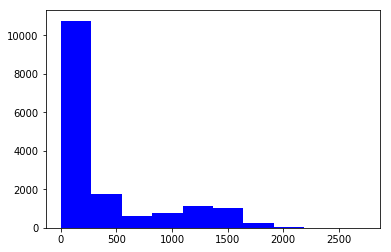

In [31]:
# Skewness
print("Skewness is: ", final_df.Total_Traffic_Passengers.skew())
plt.hist(final_df.Total_Traffic_Passengers, color='blue')

In [32]:
final_df.sort_values('Total_Traffic_Passengers', ascending=False)

,Time,Total_Traffic_Passengers,humidity,wind_speed,real_temp,day_of_week,year,month,day,rain_today_clear,rain_today_drizzle,rain_today_intensity,rain_today_others,rain_today_rain,rain_today_snow,snow_today_others,Line Name_1R,Line Name_1RW
13889,17,2738.0,70.0,90.0000,53.0960,4,2016,5,5,0,0,0,1,0,0,1,1,0
12802,17,2736.0,80.0,0.2500,50.2880,3,2016,5,4,0,0,0,0,1,0,1,1,0
12803,17,2736.0,80.0,0.2500,50.2880,3,2016,5,4,0,0,0,1,0,0,1,1,0
12826,21,2563.0,70.0,90.0000,53.3480,5,2016,4,29,0,0,0,1,0,0,1,1,0
12067,16,2300.0,300.0,40.0000,37.9400,5,2016,12,30,0,0,0,1,0,0,1,0,1
12068,12,2282.0,250.0,20.0000,33.8000,5,2016,12,30,0,0,0,1,0,0,1,0,1
12827,13,2231.0,70.0,90.0000,48.9200,5,2016,4,29,0,0,0,1,0,0,1,1,0
13145,12,2189.0,350.0,1.0000,9.9320,2,2016,1,5,0,0,0,1,0,0,1,1,0
12900,13,2187.0,360.0,40.0000,28.1480,2,2016,4,5,0,0,0,1,0,0,1,1,0
12556,13,2185.0,90.0,0.2500,71.8520,2,2016,8,2,0,0,0,0,1,0,1,1,0


In [33]:
final_df['Time'].value_counts()

13    3820
21    3425
17    3352
16    2145
12    1920
20    1770
Name: Time, dtype: int64

In [34]:
numeric_features = final_df.select_dtypes(include=[np.number])
corr = numeric_features.corr()
print(corr['Total_Traffic_Passengers'].sort_values(ascending=False)[:5],"\n")
print(corr['Total_Traffic_Passengers'].sort_values(ascending=False)[-5:])

Total_Traffic_Passengers    1.000000
month                       0.079388
real_temp                   0.060351
Line Name_1RW               0.033887
rain_today_clear            0.033864
Name: Total_Traffic_Passengers, dtype: float64 

wind_speed          -0.032768
Line Name_1R        -0.033887
day_of_week         -0.205730
year                      NaN
snow_today_others         NaN
Name: Total_Traffic_Passengers, dtype: float64


In [35]:
final_df['year'].value_counts()

2016    16432
Name: year, dtype: int64

In [43]:
final_df=final_df.iloc[:5000,[0,1,4,5,7]]
y = final_df.Total_Traffic_Passengers
X = final_df.drop(['Total_Traffic_Passengers'], axis=1)

In [44]:
final_df.head()

,Time,Total_Traffic_Passengers,real_temp,day_of_week,month
0,20,475.0,38.660,5,12
1,16,594.0,37.940,5,12
2,12,512.0,33.800,5,12
3,20,306.0,41.468,4,12
4,20,306.0,41.468,4,12


In [45]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
                                    X, y, random_state=42, test_size=.33)

In [46]:
from sklearn import linear_model
lr = linear_model.LinearRegression()
model = lr.fit(X_train, y_train)
print ("R^2 is: \n", model.score(X_test, y_test))
predictions = model.predict(X_test)

R^2 is: 
 0.308579225913


In [235]:
from sklearn.metrics import mean_squared_error
print ('RMSE is: \n', mean_squared_error(y_test, predictions))

RMSE is: 
 14740.2124783


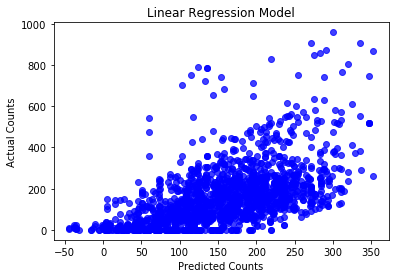

In [236]:
actual_values = y_test
plt.scatter(predictions, actual_values, alpha=.75,
            color='b') #alpha helps to show overlapping data
plt.xlabel('Predicted Counts')
plt.ylabel('Actual Counts')
plt.title('Linear Regression Model')
#plt.savefig("final_results.png")
plt.show()

## Decision tree

In [237]:
from sklearn.tree import DecisionTreeRegressor

reg = DecisionTreeRegressor(min_samples_leaf=5)

reg.fit(X_train, y_train)
print ("R^2 is: \n", reg.score(X_test, y_test))
predictions = model.predict(X_test)

from sklearn.metrics import mean_squared_error
print ('RMSE is: \n', mean_squared_error(y_test, predictions))

R^2 is: 
 0.49287430363
RMSE is: 
 14740.2124783


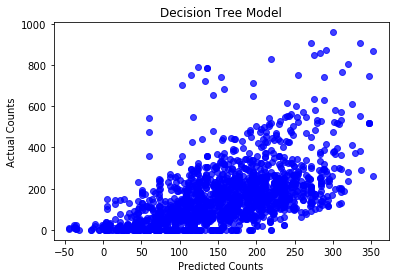

In [238]:
actual_values = y_test
plt.scatter(predictions, actual_values, alpha=.75,
            color='b') #alpha helps to show overlapping data
plt.xlabel('Predicted Counts')
plt.ylabel('Actual Counts')
plt.title('Decision Tree Model')
#plt.savefig("final_results.png")
plt.show()

## Random Forest

In [239]:
from sklearn.ensemble import RandomForestRegressor

reg = RandomForestRegressor(min_samples_leaf=5)
reg.fit(X_train, y_train)
print ("R^2 is: \n", reg.score(X_test, y_test))
predictions = model.predict(X_test)

from sklearn.metrics import mean_squared_error
print ('RMSE is: \n', mean_squared_error(y_test, predictions))

R^2 is: 
 0.518416273568
RMSE is: 
 14740.2124783


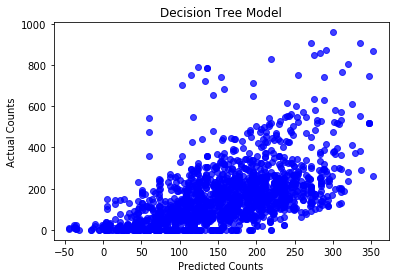

In [240]:
actual_values = y_test
plt.scatter(predictions, actual_values, alpha=.75,
            color='b') #alpha helps to show overlapping data
plt.xlabel('Predicted Counts')
plt.ylabel('Actual Counts')
plt.title('Decision Tree Model')
#plt.savefig("final_results.png")
plt.show()

# Kmeans

In [ ]:
# Plot the data
plt.scatter(data[:, 0], data[:, 1])

In [ ]:
# Use n_clusters=4 as the k value
# We can see from the plot above that there are 4 clusters
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=4)

In [ ]:
# Fit the model to the data
kmeans.fit(data)

In [ ]:
# Predict the clusters
predicted_clusters = kmeans.predict(data)

In [ ]:
# Plot the predicted clusters to see if the model predicted the correct clusters
# This is visual validation that the model was trained correctly.
plt.scatter(data[:, 0], data[:, 1], c=predicted_clusters, s=50, cmap='viridis')

# Create a Deep Learning Model

In [ ]:
voice = pd.read_csv('../Resources/voice.csv')

X = voice.drop("label", axis=1)
y = voice["label"]
print(X.shape, y.shape)

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from keras.utils import to_categorical

X_train, X_test, y_train, y_test = train_test_split(
    X, y, random_state=1, stratify=y)
X_scaler = StandardScaler().fit(X_train)
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)


# Step 1: Label-encode data set
label_encoder = LabelEncoder()
label_encoder.fit(y_train)
encoded_y_train = label_encoder.transform(y_train)
encoded_y_test = label_encoder.transform(y_test)

# Step 2: Convert encoded labels to one-hot-encoding
y_train_categorical = to_categorical(encoded_y_train)
y_test_categorical = to_categorical(encoded_y_test)

# Normal Neural Network

In [ ]:
from sklearn.preprocessing import StandardScaler

# Create a StandardScater model and fit it to the training data
X_scaler = StandardScaler().fit(X_train)

In [ ]:
# Transform the training and testing data using the X_scaler

X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

In [ ]:
from keras.utils import to_categorical

# One-hot encoding
y_train_categorical = to_categorical(y_train)
y_test_categorical = to_categorical(y_test)

In [ ]:
# first, create a normal neural network with 2 inputs, 6 hidden nodes, and 2 outputs
from keras.models import Sequential
from keras.layers import Dense

model = Sequential()
model.add(Dense(units=6, activation='relu', input_dim=2))
model.add(Dense(units=2, activation='softmax'))

In [ ]:
model.summary()

In [ ]:
# Compile the model
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [ ]:
# Fit the model to the training data
model.fit(
    X_train_scaled,
    y_train_categorical,
    epochs=100,
    shuffle=True,
    verbose=2
)

# Deep Learning
For this network, we simply add an additional hidden layer of 6 nodes

In [ ]:
deep_model = Sequential()
deep_model.add(Dense(units=6, activation='relu', input_dim=2))
deep_model.add(Dense(units=6, activation='relu'))
deep_model.add(Dense(units=2, activation='softmax'))

In [ ]:
deep_model.summary()

In [ ]:
deep_model.compile(optimizer='adam',
                   loss='categorical_crossentropy',
                   metrics=['accuracy'])

deep_model.fit(
    X_train_scaled,
    y_train_categorical,
    epochs=100,
    shuffle=True,
    verbose=2
)

# Compare the models below

In [ ]:
model_loss, model_accuracy = model.evaluate(
    X_test_scaled, y_test_categorical, verbose=2)
print(
    f"Normal Neural Network - Loss: {model_loss}, Accuracy: {model_accuracy}")

In [ ]:
model_loss, model_accuracy = deep_model.evaluate(
    X_test_scaled, y_test_categorical, verbose=2)
print(f"Deep Neural Network - Loss: {model_loss}, Accuracy: {model_accuracy}")